## Clustering Algorithm: k-means

In [1]:
#Eliminating warnings from scikit-learn 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sn
#sn.set(style='whitegrid')

### load the digit dataset

In [3]:
mnist_data=np.load('mnist.data.npy')
mnist_target=np.load('mnist.target.npy')

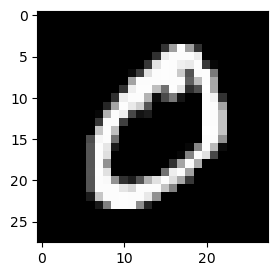

In [4]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(mnist_data[0].reshape(28,28), cmap='gray')

In [5]:
mnist_data[0].shape

(784,)

In [6]:
28*28

784

In [7]:
mnist_target[0]

0.0

In [8]:
mnist_target.shape

(70000,)

In [9]:
mnist_data.shape

(70000, 784)

### Show the digit images

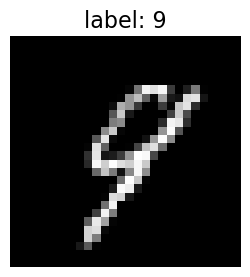

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, mnist_data.shape[0], 1000):
    I = mnist_data[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(mnist_target[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)    

## K-means
K-means is an unsupervised learning algorithm to divide samples into clusters <br>
It is unsupervised learning because the class labels of the samples are not needed/ unknown

### Apply K-means to divide the digit images into 10 clusters and find the cluster centers

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(mnist_data[::30]) #slow
kmeans.cluster_centers_.shape

(10, 784)

In [12]:
#faster
from sklearn.cluster import MiniBatchKMeans
MBkmeans = MiniBatchKMeans(n_clusters=10, batch_size=100, random_state=0)
clusters = MBkmeans.fit_predict(mnist_data)
MBkmeans.cluster_centers_.shape

(10, 784)

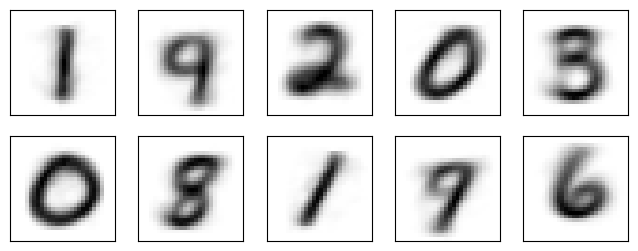

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### The argmin operation

In [14]:
A = np.array([10, 1.2, 20, 4, 5 ,6])
idx = np.argmin(A) # index of the min-element
idx

1